### Project Objective
Develop a machine learning model that can accurately classify text messages as spam (unwanted advertisement) or ham (legitimate messages), to assist in filtering and maintaining the integrity of communication channels.

### Seps
- Data Loading & Cleaning
- Exploratory Data Analysis (EDA)
- Data Processing
- Feature Engineering
- Model Development
- Model Training and Validation
- Model Evaluation
- Hyperparameter Tuning if performance not good enough
- Final Model Evaluation

### Data Loading & Cleaning

In [1]:
import pandas as pd

# Load the dataset
spam_data = pd.read_csv('spam.csv', encoding='latin-1')
spam_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [2]:
# Dropping the unnecessary columns
spam_data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

# Renaming the columns
spam_data.columns = ['label', 'message']

In [3]:
# Checking for duplicates and null values
print(spam_data.duplicated().sum(), 'duplicates found.')
print(spam_data.isnull().sum(), 'missing values found.')

403 duplicates found.
label      0
message    0
dtype: int64 missing values found.


In [4]:
# Removing duplicates
spam_data.drop_duplicates()

# Double ckeck for duplicates removal
print(spam_data.duplicated().sum(), 'duplicates found.')

# Display the final dataframe
spam_data.head()

403 duplicates found.


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### EDA

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visualisation settings
sns.set(style="whitegrid")

In [6]:
# Label distribution
label_counts = spam_data['label'].value_counts()

# Message Length
spam_data['message_length'] = spam_data['message'].apply(len)

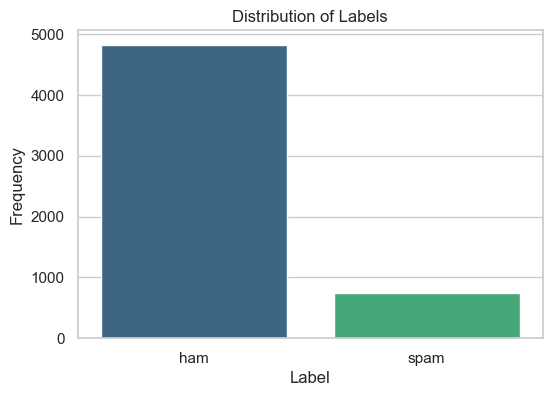

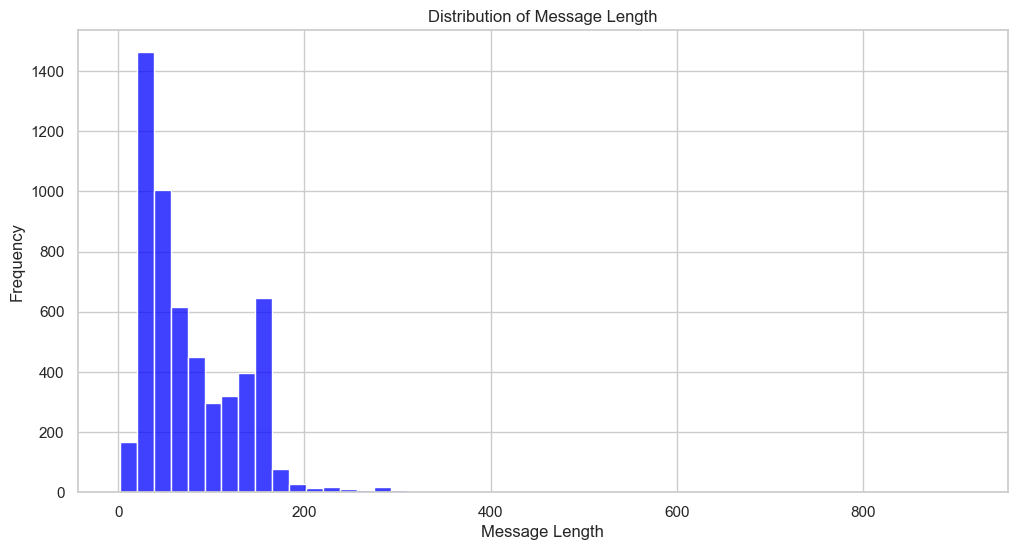

In [7]:
# Plotting label distribution
plt.figure(figsize=(6,4))
label_plot = sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

# Plotting message length distribution
plt.figure(figsize=(12,6))
length_plot = sns.histplot(spam_data['message_length'], bins=50, kde=False, color='blue')
plt.title('Distribution of Message Length')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

In [8]:
# let's drop the message length column
spam_data.drop(columns=['message_length'], inplace=True)
spam_data

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Data Processing

In [9]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import re

# Downloading the stopwords from NLTK
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/jean-
[nltk_data]     emmanuelkouadio/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/jean-
[nltk_data]     emmanuelkouadio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
# Buiding a text preprocessing function
def text_preprocessor(message):
    # Convert to lower case
    message = message.lower()
    # Remove punctuation and numbers
    message = re.sub('[^a-zA-Z]', ' ', message)
    # Tokenize
    words = word_tokenize(message)
    # Remove stopwords
    stopwords_set = set(stopwords.words('english'))
    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words if word not in stopwords_set]
    return ' '.join(words)

In [11]:
# Applying the preprocessing to the messages
spam_data['message'] = spam_data['message'].apply(text_preprocessor)

# Display the processed messages
spam_data.head()

,label,message
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri wkli comp win fa cup final tkt st m...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah think goe usf live around though


### Feature Engineering

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initiating the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fitting the vectorizer to the processed messages and transforming the data
X = vectorizer.fit_transform(spam_data['message']).toarray()
feature_names = vectorizer.get_feature_names_out()

# Creating a DataFrame for the features
features_df = pd.DataFrame(X, columns=feature_names)

# Display the head of the features dataframe
features_df.head()

,aa,aah,aaniy,aaooooright,aathi,ab,abbey,abdomen,abeg,abel,...,zebra,zed,zero,zf,zhong,zindgi,zoe,zogtoriu,zoom,zouk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Converting the labels into numerical values
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(spam_data['label'])

### Model Development and Training

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Training a Naive Bayes classifier using TF-IDF features
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [16]:
# Making predictions on the test set
y_pred = classifier.predict(X_test)

### Model Evaluation 

In [17]:
# Evaluating the model performance
from sklearn.metrics import confusion_matrix

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Generating the confusion matrix
matrix = confusion_matrix(y_test, y_pred)

In [18]:
accuracy

0.968609865470852

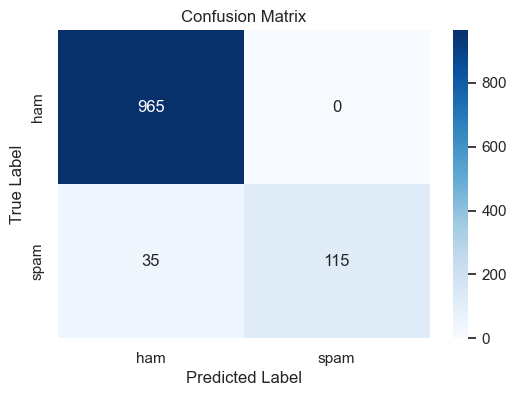

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Hyperparameters Tuning

In [20]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]
}

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(nb_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_params

{'alpha': 0.1}

In [21]:
# Training a new model with the best parameter
best_model = MultinomialNB(alpha=0.1)
best_model.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [22]:
# Making predictions using the new model
y_pred_2 = best_model.predict(X_test)

# New model evaluation
# Calculating the accuracy of the model
accuracy2 = accuracy_score(y_test, y_pred_2)

# Generating the confusion matrix
matrix2 = confusion_matrix(y_test, y_pred_2)

# display new model accuracy
accuracy2

0.9802690582959641

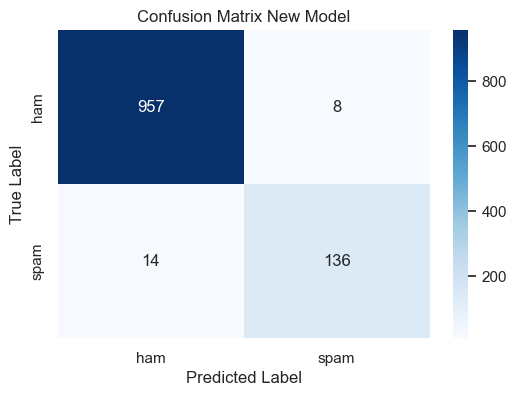

In [23]:
# Plotting the confusion matrix for the new model
plt.figure(figsize=(6, 4))
sns.heatmap(matrix2, annot=True, cmap='Blues', fmt='g', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix New Model')
plt.show()